In [1]:
import os
os.chdir("C:/Users/bhimesh/Desktop/Datasets")
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
air_data=pd.read_csv('airquality.csv')

In [3]:
air_data.apply(lambda x:sum(x.isnull()),axis=0)

Ozone      37
Solar.R     7
Wind        0
Temp        0
Month       0
Day         0
dtype: int64

In [4]:
from sklearn.preprocessing import Imputer as im

In [5]:
#using imputer to fill missing values
imputer=im(missing_values='NaN',strategy='mean',axis=0)

C:\Users\bhimesh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [6]:
air_arr=air_data.iloc[:,:].values

In [7]:
air_arr

array([[ 41. , 190. ,   7.4,  67. ,   5. ,   1. ],
       [ 36. , 118. ,   8. ,  72. ,   5. ,   2. ],
       [ 12. , 149. ,  12.6,  74. ,   5. ,   3. ],
       [ 18. , 313. ,  11.5,  62. ,   5. ,   4. ],
       [  nan,   nan,  14.3,  56. ,   5. ,   5. ],
       [ 28. ,   nan,  14.9,  66. ,   5. ,   6. ],
       [ 23. , 299. ,   8.6,  65. ,   5. ,   7. ],
       [ 19. ,  99. ,  13.8,  59. ,   5. ,   8. ],
       [  8. ,  19. ,  20.1,  61. ,   5. ,   9. ],
       [  nan, 194. ,   8.6,  69. ,   5. ,  10. ],
       [  7. ,   nan,   6.9,  74. ,   5. ,  11. ],
       [ 16. , 256. ,   9.7,  69. ,   5. ,  12. ],
       [ 11. , 290. ,   9.2,  66. ,   5. ,  13. ],
       [ 14. , 274. ,  10.9,  68. ,   5. ,  14. ],
       [ 18. ,  65. ,  13.2,  58. ,   5. ,  15. ],
       [ 14. , 334. ,  11.5,  64. ,   5. ,  16. ],
       [ 34. , 307. ,  12. ,  66. ,   5. ,  17. ],
       [  6. ,  78. ,  18.4,  57. ,   5. ,  18. ],
       [ 30. , 322. ,  11.5,  68. ,   5. ,  19. ],
       [ 11. ,  44. ,   9.7,  6

In [8]:
imputer.fit(air_arr[:,[0,1]])
air_arr[:,[0,1]]=imputer.fit_transform(air_arr[:,[0,1]])

In [9]:
df1=pd.DataFrame(air_arr)

In [10]:
df1.apply(lambda x:sum(x.isnull()),axis=0)

0    0
1    0
2    0
3    0
4    0
5    0
dtype: int64

In [11]:
df1.corr()

,0,1,2,3,4,5
0,1.000000,0.302970,-0.530936,0.608742,0.149081,0.004106
1,0.302970,1.000000,-0.055245,0.262569,-0.072904,-0.154340
2,-0.530936,-0.055245,1.000000,-0.457988,-0.178293,0.018440
3,0.608742,0.262569,-0.457988,1.000000,0.420947,-0.109867
4,0.149081,-0.072904,-0.178293,0.420947,1.000000,-0.036411
5,0.004106,-0.154340,0.018440,-0.109867,-0.036411,1.000000


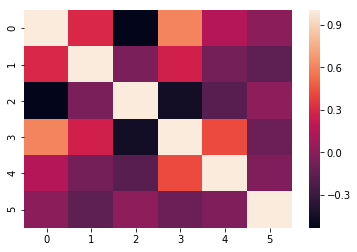

In [12]:
import seaborn as sns
corr=df1.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)

# feature engineering

In [13]:
features=df1.iloc[:,1:].values

In [14]:
features

array([[190.        ,   7.4       ,  67.        ,   5.        ,
          1.        ],
       [118.        ,   8.        ,  72.        ,   5.        ,
          2.        ],
       [149.        ,  12.6       ,  74.        ,   5.        ,
          3.        ],
       [313.        ,  11.5       ,  62.        ,   5.        ,
          4.        ],
       [185.93150685,  14.3       ,  56.        ,   5.        ,
          5.        ],
       [185.93150685,  14.9       ,  66.        ,   5.        ,
          6.        ],
       [299.        ,   8.6       ,  65.        ,   5.        ,
          7.        ],
       [ 99.        ,  13.8       ,  59.        ,   5.        ,
          8.        ],
       [ 19.        ,  20.1       ,  61.        ,   5.        ,
          9.        ],
       [194.        ,   8.6       ,  69.        ,   5.        ,
         10.        ],
       [185.93150685,   6.9       ,  74.        ,   5.        ,
         11.        ],
       [256.        ,   9.7       ,  69.   

In [15]:
labels=df1.iloc[:,0].values

In [16]:
labels

array([ 41.        ,  36.        ,  12.        ,  18.        ,
        42.12931034,  28.        ,  23.        ,  19.        ,
         8.        ,  42.12931034,   7.        ,  16.        ,
        11.        ,  14.        ,  18.        ,  14.        ,
        34.        ,   6.        ,  30.        ,  11.        ,
         1.        ,  11.        ,   4.        ,  32.        ,
        42.12931034,  42.12931034,  42.12931034,  23.        ,
        45.        , 115.        ,  37.        ,  42.12931034,
        42.12931034,  42.12931034,  42.12931034,  42.12931034,
        42.12931034,  29.        ,  42.12931034,  71.        ,
        39.        ,  42.12931034,  42.12931034,  23.        ,
        42.12931034,  42.12931034,  21.        ,  37.        ,
        20.        ,  12.        ,  13.        ,  42.12931034,
        42.12931034,  42.12931034,  42.12931034,  42.12931034,
        42.12931034,  42.12931034,  42.12931034,  42.12931034,
        42.12931034, 135.        ,  49.        ,  32.  

In [17]:
inps=pd.DataFrame(features)

In [18]:
inps.columns=['Solar.R','Wind','Temp','Month','Day']

In [ ]:
inps

,Solar.R,Wind,Temp,Month,Day
0,190.000000,7.4,67.0,5.0,1.0
1,118.000000,8.0,72.0,5.0,2.0
2,149.000000,12.6,74.0,5.0,3.0
3,313.000000,11.5,62.0,5.0,4.0
4,185.931507,14.3,56.0,5.0,5.0
5,185.931507,14.9,66.0,5.0,6.0
6,299.000000,8.6,65.0,5.0,7.0
7,99.000000,13.8,59.0,5.0,8.0
8,19.000000,20.1,61.0,5.0,9.0
9,194.000000,8.6,69.0,5.0,10.0


In [ ]:
oups=pd.DataFrame(labels)

In [ ]:
oups.columns=['Ozone']

In [ ]:
oups

,Ozone
0,41.00000
1,36.00000
2,12.00000
3,18.00000
4,42.12931
5,28.00000
6,23.00000
7,19.00000
8,8.00000
9,42.12931


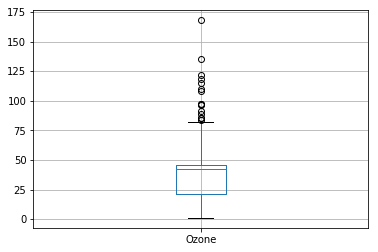

In [ ]:
#box plot for ozone values
#their are two outlier values
oups.boxplot(column="Ozone")

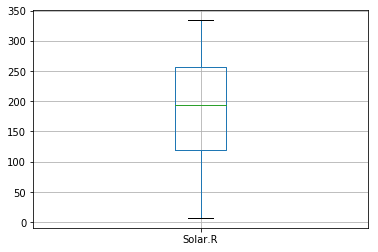

In [ ]:
inps.boxplot(column="Solar.R")

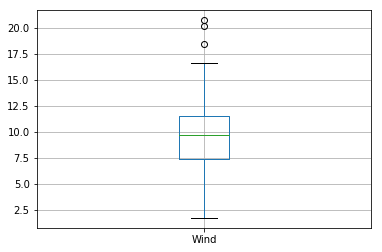

In [ ]:
#boxplot for wind
#three outlier are present
inps.boxplot(column="Wind")

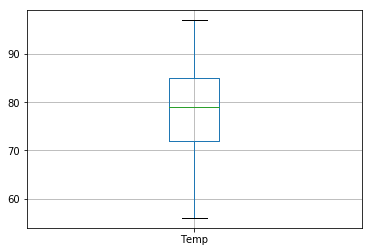

In [ ]:
#temperature boxplit
inps.boxplot(column="Temp")

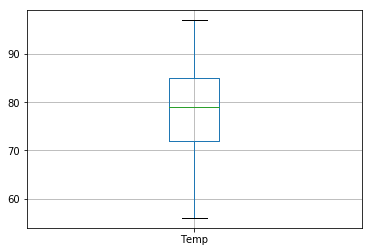

In [ ]:
#month box plot
inps.boxplot(column="Temp")

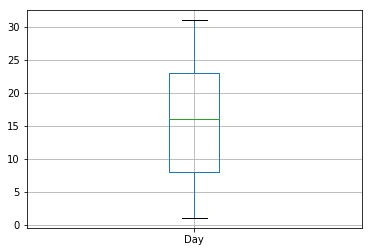

In [ ]:
#day boxplot
inps.boxplot(column="Day")

In [ ]:
inps.describe()

,Solar.R,Wind,Temp,Month,Day
count,153.000000,153.000000,153.000000,153.000000,153.000000
mean,185.931507,9.957516,77.882353,6.993464,15.627451
std,87.960267,3.523001,9.465270,1.416522,8.848790
min,7.000000,1.700000,56.000000,5.000000,1.000000
25%,120.000000,7.400000,72.000000,6.000000,8.000000
50%,194.000000,9.700000,79.000000,7.000000,16.000000
75%,256.000000,11.500000,85.000000,8.000000,23.000000
max,334.000000,20.700000,97.000000,9.000000,31.000000


In [ ]:
inps.corr()

,Solar.R,Wind,Temp,Month,Day
Solar.R,1.000000,-0.055245,0.262569,-0.072904,-0.154340
Wind,-0.055245,1.000000,-0.457988,-0.178293,0.018440
Temp,0.262569,-0.457988,1.000000,0.420947,-0.109867
Month,-0.072904,-0.178293,0.420947,1.000000,-0.036411
Day,-0.154340,0.018440,-0.109867,-0.036411,1.000000


In [ ]:
import seaborn as sns

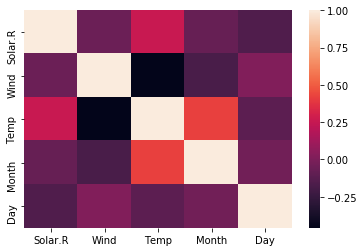

In [ ]:
corr=inps.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)

C:\Users\bhimesh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


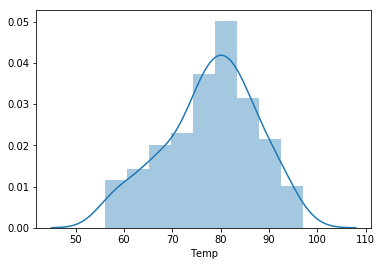

In [ ]:
sns.distplot(inps['Temp'])

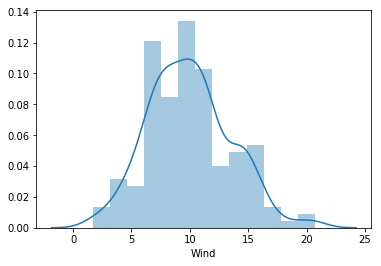

In [ ]:
sns.distplot(inps['Wind'])

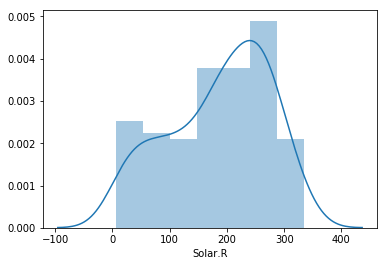

In [ ]:
sns.distplot(inps['Solar.R'])

In [ ]:
solar=inps['Solar.R']
wind=inps['Wind']
temp=inps['Temp']
ozone=oups['Ozone']

In [ ]:
import statsmodels.api as sm
model1=sm.OLS(ozone,temp).fit()

In [ ]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Ozone   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     441.5
Date:                Wed, 15 May 2019   Prob (F-statistic):           8.24e-47
Time:                        10:02:15   Log-Likelihood:                -714.23
No. Observations:                 153   AIC:                             1430.
Df Residuals:                     152   BIC:                             1433.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Temp           0.5598      0.027     21.011      0.000       0.507       0.612
==============================================================================
Omnibus:                       60.657   Durbin-Watson:                   1.221
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.386
Skew:                           1.637   Prob(JB):                     5.47e-36
Kurtosis:                       6.841   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
import statsmodels.api as sm
model2=sm.OLS(ozone,wind).fit()

In [ ]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Ozone   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     131.5
Date:                Wed, 15 May 2019   Prob (F-statistic):           2.49e-22
Time:                        10:02:15   Log-Likelihood:                -770.73
No. Observations:                 153   AIC:                             1543.
Df Residuals:                     152   BIC:                             1546.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Wind           3.2847      0.286     11.469      0.000       2.719       3.851
==============================================================================
Omnibus:                       34.835   Durbin-Watson:                   0.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.202
Skew:                           1.169   Prob(JB):                     1.70e-12
Kurtosis:                       4.742   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
import statsmodels.api as sm
model3=sm.OLS(ozone,solar).fit()

In [ ]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Ozone   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     314.1
Date:                Wed, 15 May 2019   Prob (F-statistic):           8.09e-39
Time:                        10:02:15   Log-Likelihood:                -732.70
No. Observations:                 153   AIC:                             1467.
Df Residuals:                     152   BIC:                             1470.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Solar.R        0.2033      0.011     17.724      0.000       0.181       0.226
==============================================================================
Omnibus:                       17.298   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.801
Skew:                           0.729   Prob(JB):                     3.04e-05
Kurtosis:                       4.066   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# applying linear regression

In [ ]:
from sklearn.model_selection import train_test_split

# model based on temp

In [ ]:
X=inps['Temp']
y=oups['Ozone']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [ ]:
X_train

132    73.0
73     81.0
18     68.0
48     65.0
4      56.0
45     79.0
75     80.0
39     90.0
36     79.0
118    88.0
141    68.0
108    79.0
12     66.0
148    70.0
84     86.0
123    91.0
136    71.0
11     69.0
114    75.0
2      74.0
105    80.0
6      65.0
0      67.0
111    78.0
65     83.0
55     75.0
104    82.0
135    77.0
46     77.0
62     85.0
       ... 
13     68.0
88     88.0
8      61.0
81     74.0
60     83.0
128    84.0
1      72.0
57     73.0
22     61.0
61     84.0
63     81.0
7      59.0
86     82.0
96     85.0
68     92.0
50     76.0
139    67.0
101    92.0
20     59.0
25     58.0
134    76.0
71     82.0
129    80.0
144    71.0
79     87.0
133    81.0
137    71.0
72     73.0
140    76.0
37     82.0
Name: Temp, Length: 107, dtype: float64

In [ ]:
y_train

132     24.00000
73      27.00000
18      30.00000
48      20.00000
4       42.12931
45      42.12931
75       7.00000
39      71.00000
36      42.12931
118     42.12931
141     24.00000
108     59.00000
12      11.00000
148     30.00000
84      80.00000
123     96.00000
136      9.00000
11      16.00000
114     42.12931
2       12.00000
105     65.00000
6       23.00000
0       41.00000
111     44.00000
65      64.00000
55      42.12931
104     28.00000
135     28.00000
46      21.00000
62      49.00000
         ...    
13      14.00000
88      82.00000
8        8.00000
81      16.00000
60      42.12931
128     32.00000
1       36.00000
57      42.12931
22       4.00000
61     135.00000
63      32.00000
7       19.00000
86      20.00000
96      35.00000
68      97.00000
50      13.00000
139     18.00000
101     42.12931
20       1.00000
25      42.12931
134     21.00000
71      42.12931
129     20.00000
144     23.00000
79      79.00000
133     44.00000
137     13.00000
72      10.000

In [ ]:
X_train=X_train.values.reshape((-1,1))

In [ ]:
X_train

array([[73.],
       [81.],
       [68.],
       [65.],
       [56.],
       [79.],
       [80.],
       [90.],
       [79.],
       [88.],
       [68.],
       [79.],
       [66.],
       [70.],
       [86.],
       [91.],
       [71.],
       [69.],
       [75.],
       [74.],
       [80.],
       [65.],
       [67.],
       [78.],
       [83.],
       [75.],
       [82.],
       [77.],
       [77.],
       [85.],
       [91.],
       [86.],
       [82.],
       [76.],
       [83.],
       [74.],
       [84.],
       [74.],
       [93.],
       [87.],
       [82.],
       [77.],
       [68.],
       [67.],
       [61.],
       [88.],
       [69.],
       [75.],
       [89.],
       [94.],
       [64.],
       [86.],
       [82.],
       [78.],
       [84.],
       [64.],
       [81.],
       [93.],
       [85.],
       [76.],
       [57.],
       [81.],
       [82.],
       [57.],
       [77.],
       [81.],
       [78.],
       [73.],
       [73.],
       [89.],
       [62.],
      

In [ ]:
from sklearn import linear_model as lm
temp_model=lm.LinearRegression()
results=temp_model.fit(X_train,y_train)

In [ ]:
#accuracy of model
accuracy=temp_model.score(X_train,y_train)

In [ ]:
print("accuracy of temp model is",accuracy)

accuracy of temp model is 0.3078256610832244


In [ ]:
X_test=X_test.values.reshape((-1,1))

In [ ]:
predictions=temp_model.predict(X_test)

In [ ]:
plt.scatter(y_test,predictions)

# Multi varient anaylsis

In [ ]:
inps

In [ ]:
X=inps[["Solar.R","Temp","Wind"]]
y=oups['Ozone']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
X_train

In [ ]:
X_train=X_train.values.reshape((122,3))

In [ ]:
X_train

In [ ]:
from sklearn import linear_model as lm
a_model=lm.LinearRegression()
results=a_model.fit(X_train,y_train)

In [ ]:
accuracy=a_model.score(X_train,y_train)

In [ ]:
accuracy

In [ ]:
X_test.describe()

In [ ]:
X_test=X_test.values.reshape((31,3))

In [ ]:
predictions=a_model.predict(X_test)

In [ ]:
plt.scatter(y_test,predictions)